# İNTRODUCTİON
<font color='blue'>
CONTENT:
    
1. [Load and Check Data](#1)
2. [Variable Description](#2)
    * [Univariate Variables Description](#3)
    
        * [Categorical Variables Description](#4)
    
        * [Numerical Variables Description](#5)
3. [Basic Data Analysis](#6)
4. [Outlier Detection](#7)
5. [Missing Value](#8)
    
   * [Find Missing Value](#9)
    
   * [Fill Missing Value](#10)
6.[Vizualition](#11)
    
   * [Correlation Between SibSp -- Parch -- Age -- Survived -- Fare  ](#12)
    
   * [SibSp -- Survived](#13)
    
   * [Parch -- Survived](#14)
    
   * [Pclass -- Survived](#15)
    
   * [Age -- Survived](#16)
   
   * [Pclass -- Survived -- Age](#17)
  
   * [Embarked -- Sex -- Pclass -- Survived ](#18)
    
   * [Embarked -- Sex -- Fare -- Survived](#19)
    
   * [Fill Missing: Age Value](#20)
7. [Feature Engineering](#21)          
    * [Name -- Title](#22)
    
    * [Family Size](#23)
    
    * [Embarked](#24)
    
    * [Ticket](#25)
    
    * [Pclass](#26)
    
    * [Sex](#27)
    
    * [Drop Passenger Id and Cabin](#28)
    
8. [Modeling](#29)
    * [Train - Test Split](#30)
    
    * [Simple Logistic Regrerssion](#31)
    
    * [Hyperparammeter Tuning](#32)
    
    * [Ensemble Modeling](#33)
    
    * [Prediction and Submission](#34)
    
    

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current sessio

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a>
# Load and Check Data

In [3]:
train= pd.read_csv("/kaggle/input/titanic/train.csv")
test=pd.read_csv("/kaggle/input/titanic/test.csv")
test_PassengerId= test.PassengerId
gend_sub=pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

In [4]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id='2'></a>
# Varible Description
    1.PassengerId 
    2.Survived
    3.Pclass
    4.Name
    5.Sex 
    6.Age
    7.SibSp
    8.Parch
    9.Ticket
    10.Fare
    11.Cabin
    12.Embarked

<a id='4'></a>
# Categorical Variables Description

In [7]:
def bar_plot(variable):
    var = train[variable]
    varValue= var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index,varValue.index.values)
    plt.title("Variable")
    plt.show()
    
    print("{}  \n  {}".format(variable,varValue))

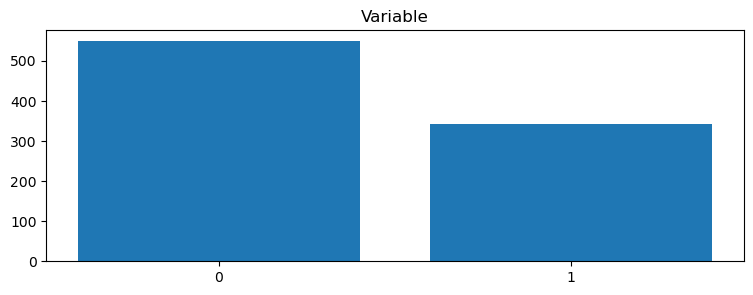

Survived  
  0    549
1    342
Name: Survived, dtype: int64


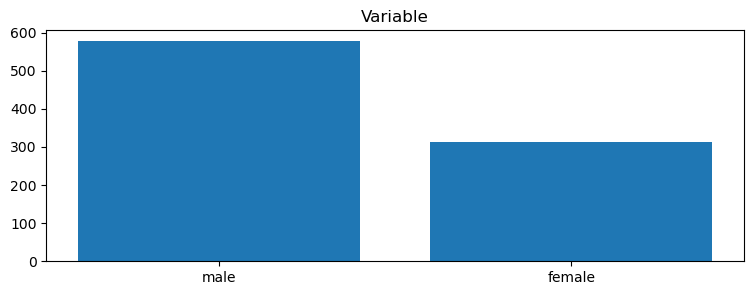

Sex  
  male      577
female    314
Name: Sex, dtype: int64


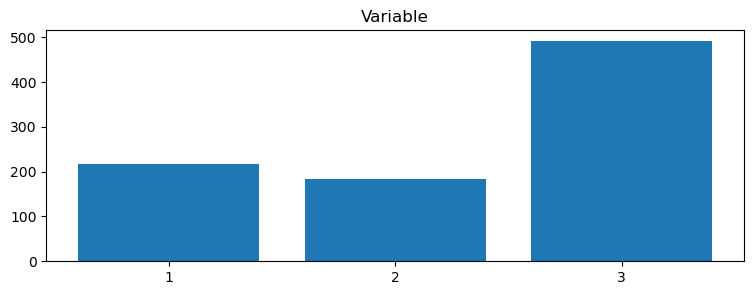

Pclass  
  3    491
1    216
2    184
Name: Pclass, dtype: int64


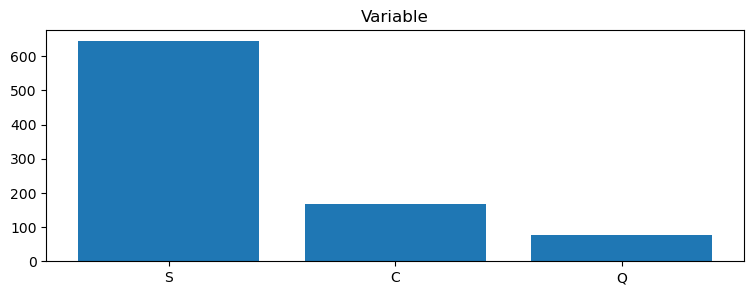

Embarked  
  S    644
C    168
Q     77
Name: Embarked, dtype: int64


KeyError: 'SibSp '

In [8]:
category=["Survived","Sex","Pclass", "Embarked", "SibSp "," Parch"]
for i in category:
    bar_plot(i)

<a id='5'></a>
# Numerical Variables Description

In [ ]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train[variable])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
numericVar = ["Fare", "Age","PassengerId"]
for j in numericVar:
    plot_hist(j)

<a id='6'></a>
# Basic Data Analysis
    *Pclass - Survived
    *Sibsp - Survived
    *Parch - Survived
    *Sex - Survived

In [ ]:
train[["Pclass","Survived"]]

In [ ]:
# Pclass - Survived
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean()

In [ ]:
train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived", ascending=False)

<a id='7'></a>
# Outlier Detection

In [ ]:
def outlier_detect(df.features):
    outlier_indices=[]
    
    for c in  outlier_indices:
    
    #1st quartile
  
    Q1=np.percentile(df[c].25)
    
    #3rd quartile 
    Q3=np.percentile(df[c].75)
    
    #IQR
    IQR=Q3-Q1
    
    #Outlier step
    outlier_step= IQR * 1,5
    #detect outlier and their indices
    outlier_list_col= df[(df[c]<Q1-outlier_step|df[c]>Q3-outlier_step)]
    #store indices
    outlier_indices.extend(outlier_list_col)
    
    
    
outlier_indices = Counter( outlier_indices)

<a id='8'></a>
# Missing Value
         *Find Missing Value
         *Fill Missing Value

In [43]:
train_len = len(train)
train=pd.concat([train,test],axis=0).reset_index(drop=True)

<a id='9'></a>
# Find Missing Value
     

In [ ]:
train.columns[train.isnull().any()]

In [ ]:
train.isnull().sum()

# Fill Missing Value
<a id='10'></a>

In [ ]:
train[train["Embarked"].isnull()]

In [ ]:
train.boxplot(column="Fare",by="Embarked")
plt.show

In [ ]:
train["Embarked"]= train["Embarked"].fillna("C")
train[train["Embarked"].isnull()]

In [ ]:
train[train["Cabin"].isnull()]

<a id='11'></a>
# Vizualition

<a id='12'></a>
# Correlation Between SibSp -- Parch -- Age -- Survived -- Fare

In [ ]:
list = ["SibSp","Parch","Age" , "Survived", "Fare"]
sns.heatmap(train[list].corr(),annot=True, fmt="2f")
plt.show()

<a id='13'></a>
# SibSp -- Survived

In [ ]:
g = sns.barplot(x="SibSp", y= "Survived", data = train)
g.set_ylable("Survived Probability")
plt.show()

**** Having a lot of SibSp have less chance to survive
if SipSp<2 & SipSp>0 more chance to survive than SipSb>3

<a id='14'></a>
# Parch -- Survived

In [ ]:
g = sns.barplot(x ="Parch", y="Survived", data=train)
plt.show()

     *SibSp and Parch can be used for new feature extraction with th=3.

     *Small families have more chance to survive.


<a id='15'></a>
# Pclass -- Survived

In [ ]:
sns.barplot(x="Pclass",y="Survived",data=train,width = 0.5)
plt.ylabel("Survived Probability")
plt.show()

<a id='16'></a>
# Age -- Survived

In [ ]:
g=sns.FacetGrid(train, col="Survived")
g.map(sns.displot,"Age", bins=25)
plt.show()

 * age <= 10 has a high survival probability

 * oldest passenger (80) 

<a id='17'></a>
# Pclass -- Survived -- Age

In [ ]:
g=sns.FacetGrid(train, col="Survived", row="Pclass")
g.map(plt.hist,"Age", bins=25)
g.add_legend()
plt.show()

  * Pclass is important feature for model training 

<a id='18'></a>
# Embarked -- Sex -- Pclass -- Survived

In [ ]:
g=sns.FacetGrid(train, row="Embarked")
g.map(sns.pointplot,"Pclass","Survived","Sex")
g.add_legend()
plt.show()

  * Female passenger have much better survival than males.
  
  

<a id='19'></a>
# Embarked -- Sex -- Fare -- Survived

In [ ]:
g=sns.FacetGrid(train, row="Embarked", col ="Survived")
g.map(sns.barplot,"Fare","Sex")
g.add_legend()
plt.show()

<a id='20'></a>
# Fill Missing: Age Value

In [ ]:
train[train["Age"].isnull()]

In [ ]:
sns.boxplot(x="Sex", y="Age",data=train)
plt.show()

   * Sex is not informative for age predictive, age distribution seems to be same

In [ ]:
sns.boxplot(x="Sex", y="Age",hue="Pclass",data=train)
plt.show()

    * 1st class passenger are older than 2nd and, 2nd class passenger are older than 3rd.

In [ ]:
sns.boxplot(x="Parch", y="Age",data=train)
plt.show()

In [ ]:
sns.boxplot(x="SibSp", y="Age",data=train)
plt.show()

In [ ]:
train["Sex"] = [ 1 if i =="male" else 0 for i in train["Sex"]]

In [ ]:
sns.heatmap(train[["Age","Sex","SibSp","Parch","Pclass"]].corr(),annot=True)
plt.show()

In [ ]:
index_nan_age = train["Age"][train["Age"].isnull()].index
for i in index_nan_age:
    age_pred = train["Age"][((train["SibSp"]== train.iloc[i]["SibSp"])& ( train["Parch"]== train.iloc[i]["Parch"]) & (train["Pclass"]== train.iloc[i]["Pclass"]))].mean()
    train["Age"].median()
    
    
age_pred

<a id='21'></a>
# Feature Engineering

<a id='22'></a>
## Name -- Title

In [ ]:
train["Name"].head(10)

In [ ]:
name=train["Name"]
train["Title"]= [i.split(".")[0].split(",")[-1].strip() for i in name ]

In [ ]:
train["Title"].head(10)

In [ ]:
sns.countplot(x= "Title", data=train)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
#Convert to categorical
train["Title"] =train["Title"].replace(["Lady", "the Countess","Col","Capt","Jonkheer","Don","Dr","Rev","Major","Sir"],"Other")

In [ ]:
sns.countplot(x= "Title", data=train)
plt.xticks(rotation = 60)
plt.show()

<a id='23'></a>
## Family Size

In [10]:
train["Fsize"] = train["SibSp"] + train["Parch"] + 1

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


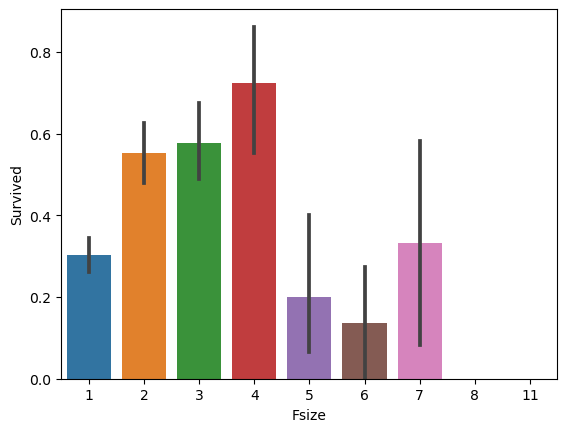

In [14]:
g=sns.barplot(x ="Fsize", y = "Survived", data=train)
plt.show()

In [15]:
train["family_size"] = [1 if i<5 else 0 for i in train["Fsize"]]

In [17]:
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2,1


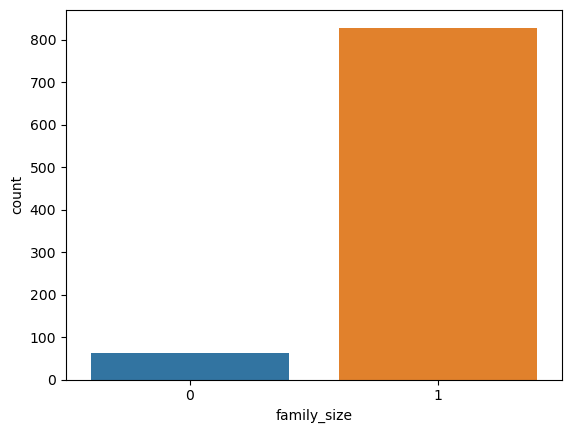

In [19]:
sns.countplot(x= "family_size", data=train)

plt.show()

<a id='24'></a>
## Embarked

In [20]:
train["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

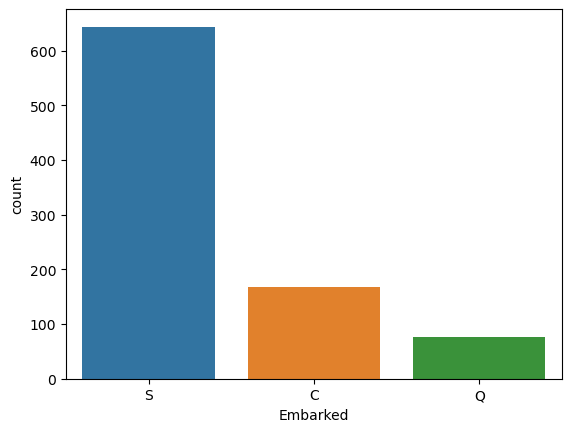

In [22]:
sns.countplot(x= "Embarked", data=train)
plt.show()

In [23]:
train = pd.get_dummies(train, columns=["Embarked"])
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1,0,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,1,1,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,5,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,3,1,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,2,1,1,0,0


<a id='25'></a>
## Ticket 

In [24]:
train["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [31]:
train = pd.get_dummies(train, columns=["Ticket"], prefix="T")
train.head(10)

KeyError: "None of [Index(['Ticket'], dtype='object')] are in the [columns]"

<a id='26'></a>
## Pclass 

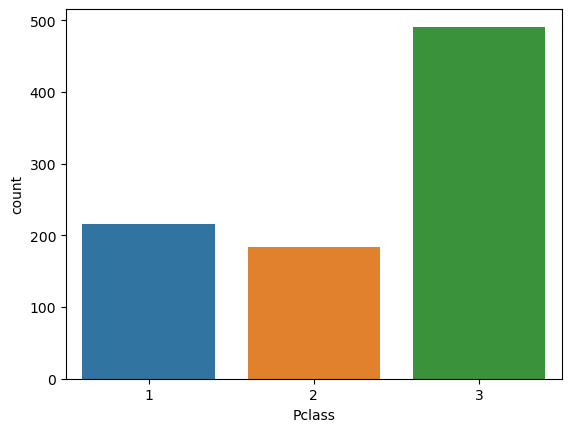

In [32]:
sns.countplot(x= "Pclass", data=train)

plt.show()

In [33]:
train["Pclass"]=train["Pclass"].astype("category")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,...,T_STON/O2. 3101290,T_SW/PP 751,T_W./C. 14258,T_W./C. 14263,T_W./C. 6607,T_W./C. 6608,T_W./C. 6609,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,...,0,0,0,0,0,0,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,...,0,0,0,0,0,0,0,0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,...,0,0,0,0,0,0,0,0,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,...,0,0,0,0,0,0,0,0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,...,0,0,0,0,0,0,0,0,0,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,...,0,0,0,0,0,0,0,0,0,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,...,0,0,0,0,0,0,0,0,0,0


<a id='27'></a>
## Sex 

In [39]:
train['Sex'] = train['Sex'].astype('category')
#train = pd.get_dummies(train, columns=['Sex'])


KeyError: 'Sex'

<a id='28'></a>
## Drop Passenger Id & Cabin 

In [40]:
train.drop(labels=["PassengerId","Cabin"], inplace=True, axis=1)

In [41]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Fsize',
       'family_size', 'Embarked_C',
       ...
       'T_W./C. 14258', 'T_W./C. 14263', 'T_W./C. 6607', 'T_W./C. 6608',
       'T_W./C. 6609', 'T_W.E.P. 5734', 'T_W/C 14208', 'T_WE/P 5735',
       'Sex_female', 'Sex_male'],
      dtype='object', length=695)

<a id='29'></a>

# Modeling

In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


<a id='30'></a>
## Train - Test Split

In [44]:
train_len

891

In [45]:
test=train[train_len:]
test.drop(labels=["Survived"],axis=1, inplace=True)

/tmp/ipykernel_32/4273762519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(labels=["Survived"],axis=1, inplace=True)


In [46]:
test.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Fsize,family_size,Embarked_C,Embarked_Q,...,T_W.E.P. 5734,T_W/C 14208,T_WE/P 5735,Sex_female,Sex_male,PassengerId,Sex,Ticket,Cabin,Embarked
891,3,"Kelly, Mr. James",34.5,0,0,7.8292,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,892.0,male,330911,NaN,Q
892,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,893.0,female,363272,NaN,S
893,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,894.0,male,240276,NaN,Q
894,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,895.0,male,315154,NaN,S
895,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,896.0,female,3101298,NaN,S


In [65]:
TRAİN = train[:train_len]
x_train = TRAİN.drop(labels = "Survived", axis = 1)
y_train = TRAİN["Survived"]
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(x_train))
print("X_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 596
X_test 295
y_train 596
y_test 295
test 418


<a id='31'></a>

# Simple Logistic Regression

In [66]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_log_train = round(logreg.score(x_train, y_train)*100,2) 
acc_log_test = round(logreg.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

ValueError: could not convert string to float: 'McCarthy, Mr. Timothy J'

<a id='32'></a>

# Hyperparameter Tuning

We will compare 5 ml classifier and evaluate mean accuracy of each of them by stratified cross validation.

    * Decision Tree
    * SVM
    * Random Forest
    * KNN
    * Logistic Regression

In [68]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [69]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


ValueError: 
All the 2500 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Mudd, Mr. Thomas Charles'

--------------------------------------------------------------------------------
2250 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 186, in fit
    X, y = self._validate_data(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 579, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/opt/conda/lib/python3.10/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'McCarthy, Mr. Timothy J'


In [70]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

ValueError: All arrays must be of the same length

<a id='33'></a>

# Ensemble Modeling

In [71]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test),y_test))

IndexError: list index out of range

<a id='34'></a>

# Prediction and Submission

In [72]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)

NameError: name 'votingC' is not defined